# CSE4510 Activity 1
Grant Butler | Pandas EDA

In [1]:
import pandas as pd

### Question 1:
##### a. Loading the dataset using pandas

In [2]:
# 1a.
brooklyn = pd.read_csv("data/rollingsales_brooklyn.csv", skiprows = 4) 
# first four rows of data had info that was messing up the information

##### b. Display shape of data

In [3]:
# 1b.
brooklyn.shape

(23373, 21)

##### c. Display the first 2 rows

In [4]:
# 1c.
brooklyn.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1103,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$403,572",7/9/13
1,3,,15 CONDOS - 2-10 UNIT RESIDENTIAL,,814,1105,,,342 53RD STREET,,...,0,0,0,0,0,0,2,R1,"$218,010",7/12/13


##### d. Display row 14

In [5]:
# 1d. 
brooklyn.iloc[14]

BOROUGH                                                                      3
NEIGHBORHOOD                                         BATH BEACH               
BUILDING CLASS CATEGORY                                                       
TAX CLASS AT PRESENT                                                         4
BLOCK                                                                     6370
LOT                                                                       1321
EASE-MENT                                                                     
BUILDING CLASS AT PRESENT                                                   RP
ADDRESS                             98 BAY 20TH   STREET                      
APART\nMENT\nNUMBER                                               P1          
ZIP CODE                                                                 11214
RESIDENTIAL UNITS                                                            0
COMMERCIAL UNITS                                    

- - -

### Question 2:
##### a. Converting column names to lower case

In [6]:
brooklyn.columns = [x.lower() for x in brooklyn.columns.tolist()]

##### b. Replace the '\n' in the column names with space

In [7]:
brooklyn.columns = [x.replace('\n', ' ') for x in brooklyn.columns.tolist()]

##### c. Replace the spaces in the names with underscores

In [8]:
brooklyn.columns = [x.replace(' ', '_') for x in brooklyn.columns.tolist()]

##### d. Display row 14 again to see the changes

In [9]:
brooklyn.iloc[14]

borough                                                                      3
neighborhood                                         BATH BEACH               
building_class_category                                                       
tax_class_at_present                                                         4
block                                                                     6370
lot                                                                       1321
ease-ment                                                                     
building_class_at_present                                                   RP
address                             98 BAY 20TH   STREET                      
apart_ment_number                                                 P1          
zip_code                                                                 11214
residential_units                                                            0
commercial_units                                    

- - -

### Question 3:
##### Convert field `sale_price` to numeric.

In [10]:
import re

# remove_things = [x.replace('$', '') for x in brooklyn['sale_price'].tolist()]
# final = [x.replace(',', '') for x in remove_things]

# easier with regular expression crutch ( ಡ益ಡ)
# brooklyn['sale_price']

brooklyn['sale_price'] = [re.sub('[^0-9]', '', x) for x in brooklyn['sale_price']]

              
brooklyn['sale_price'] = brooklyn['sale_price'].astype('int') # changing the actual data type

Quick Question:

I am a bit confused why this didn't work to convert the column.

```py
pd.to_numeric(brooklyn['sale_price'])
```

When I tried to use this and then tried to do question 4, I would keep getting an error that said the comparison was between a str and an int, despite me double checking that the dtype was definitely int64. I'm not sure why that is, since there were no errors when using the `to_numeric` function since all of the fields were numbers. Do you have any insight as to why?
- - -

### Quesiton 4:
##### Display count of missing sale prices

In [11]:
# getting constraint of the rows that are zero in field 'sale_price'
missing_sale = brooklyn['sale_price']<1

# getting the count and printing it
count = brooklyn[missing_sale].value_counts().sum() 

print(count)

8791


- - -

### Question 5:
##### Convert `land_square_feet` to numeric

In [12]:
# removing anything that is not a number
brooklyn['land_square_feet'] = [re.sub('[^0-9]', '', x) for x in brooklyn['land_square_feet']]

# converting to integers
brooklyn['land_square_feet'] = brooklyn['land_square_feet'].astype('int')

- - -

### Question 6:
##### Converting `gross_square_feet` to numeric

In [13]:
brooklyn['gross_square_feet'] = [re.sub('[^0-9]', '', x) for x in brooklyn['gross_square_feet']]
brooklyn['gross_square_feet'] = brooklyn['gross_square_feet'].astype('int')

##### Converting `sale_date` to datetime

In [14]:
pd.to_datetime(brooklyn['sale_date'])

0       2013-07-09
1       2013-07-12
2       2013-04-25
3       2013-04-25
4       2013-04-25
           ...    
23368   2013-01-17
23369   2013-01-17
23370   2012-12-28
23371   2013-04-17
23372   2012-12-14
Name: sale_date, Length: 23373, dtype: datetime64[ns]

##### Converting `year_built` to numeric

In [15]:
brooklyn['year_built'] = brooklyn['year_built'].astype('int32')

##### Converting `zip_code` to string

In [16]:
brooklyn['zip_code'] = brooklyn['zip_code'].astype('str')

##### Displaying dtypes

In [17]:
brooklyn.dtypes

borough                            int64
neighborhood                      object
building_class_category           object
tax_class_at_present              object
block                              int64
lot                                int64
ease-ment                         object
building_class_at_present         object
address                           object
apart_ment_number                 object
zip_code                          object
residential_units                  int64
commercial_units                   int64
total_units                        int64
land_square_feet                   int64
gross_square_feet                  int64
year_built                         int32
tax_class_at_time_of_sale          int64
building_class_at_time_of_sale    object
sale_price                         int64
sale_date                         object
dtype: object

- - -

### Question 7:
##### Changing `EAST/WEST` to `E/W` for each address

In [18]:
brooklyn['address'] = [x.replace('EAST', 'E') for x in brooklyn['address']]
brooklyn['address'] = [x.replace('WEST', 'W') for x in brooklyn['address']]

- - -

### Question 8:
##### Changing `STREET/AVENUE` to `ST/AVE` in each address

In [19]:
brooklyn['address'] = [x.replace('STREET', 'ST') for x in brooklyn['address']]
brooklyn['address'] = [x.replace('AVENUE', 'AVE') for x in brooklyn['address']]

- - -

### Question 9:
#### Plotting histograms

##### sale price by counts

In [20]:
from matplotlib import pyplot as plt

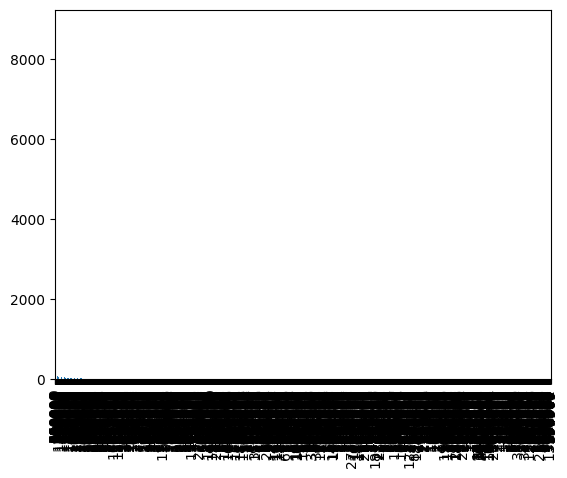

In [31]:
brooklyn['sale_price'].value_counts().plot.bar();

- - -

### Question 10:
##### Filtering data by family homes

In [22]:
brooklyn.loc[brooklyn['building_class_category'].str.contains('FAMILY')]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
25,3,BATH BEACH,01 ONE FAMILY HOMES,1,6363,23,,A9,8641 16TH AVE,,...,1,0,1,2058,1492,1930,1,A9,560000,6/6/13
26,3,BATH BEACH,01 ONE FAMILY HOMES,1,6366,69,,A1,8658 BAY 16TH ST,,...,1,0,1,4833,1724,1930,1,A1,860000,12/18/12
27,3,BATH BEACH,01 ONE FAMILY HOMES,1,6371,21,,A9,73 BAY 20TH ST,,...,1,0,1,2417,2132,1930,1,A9,508000,8/24/12
28,3,BATH BEACH,01 ONE FAMILY HOMES,1,6378,64,,A1,56 BAY 28TH ST,,...,1,0,1,3867,1704,1899,1,A1,600000,6/18/13
29,3,BATH BEACH,01 ONE FAMILY HOMES,1,6379,42,,S1,2142 86TH ST,,...,1,1,2,1600,2640,1925,1,S1,0,12/14/12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23292,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3311,15,,C0,382 BLEECKER ST,,...,3,0,3,2000,2880,1931,1,C0,100000,10/2/12
23293,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3319,42,,C0,377 GROVE ST,,...,3,0,3,2000,4000,1931,1,C0,0,12/7/12
23294,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3320,37,,C0,427 GROVE ST,,...,3,0,3,2000,4194,1920,1,C0,0,2/4/13
23295,3,WYCKOFF HEIGHTS,03 THREE FAMILY HOMES,1,3371,14,,C0,1384 MADISON ST,,...,3,0,3,2000,4400,1910,1,C0,600000,6/10/13


### Question 11:
##### Create a log scatter plot of `gross_sqft` vs `sale_price`

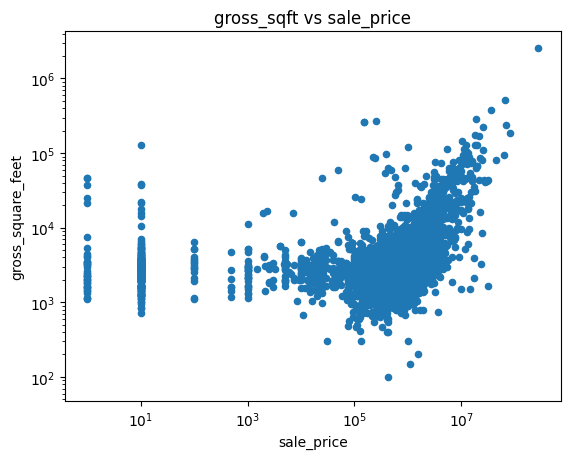

In [53]:
# gross_square_feet vs sale
brooklyn.plot.scatter(x='sale_price', y='gross_square_feet', loglog=True, title="gross_sqft vs sale_price");

- - -

### Question 12:
##### Getting subset of homes where `sale_price` < $100,000

In [33]:
under_one_k = brooklyn['sale_price']<100000
brooklyn[under_one_k]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apart_ment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
6,3,,18 TAX CLASS 3 - UTILITY PROPERTIES,3,7247,114,,U2,873 NEPTUNE AVE,,...,0,0,0,0,0,0,3,U2,0,7/25/13
8,3,BATH BEACH,,4,6370,1308,,RP,88 BAY 20TH ST,P7,...,0,0,1,0,0,2011,4,RP,0,11/19/12
9,3,BATH BEACH,,4,6370,1309,,RP,88 BAY 20TH ST,P8,...,0,0,1,0,0,2011,4,RP,0,4/22/13
10,3,BATH BEACH,,4,6370,1310,,RP,88 BAY 20TH ST,P9,...,0,0,1,0,0,2011,4,RP,0,11/12/12
11,3,BATH BEACH,,4,6370,1311,,RP,88 BAY 20TH ST,P10,...,0,0,1,0,0,2011,4,RP,0,2/8/13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23366,3,WYCKOFF HEIGHTS,29 COMMERCIAL GARAGES,4,3248,54,,G9,297 STOCKHOLM ST,,...,0,1,1,2500,2500,1931,4,G9,0,4/17/13
23368,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3167,8,,E9,1144 FLUSHING AVE,,...,0,1,1,10250,6675,1931,4,E9,0,1/17/13
23369,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3167,69,,E9,349 JEFFERSON ST,,...,0,1,1,3600,2800,1931,4,E9,0,1/17/13
23371,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3248,55,,E9,295 STOCKHOLM ST,,...,0,1,1,2500,2475,1931,4,E9,0,4/17/13


##### Number of homes under $100,000

In [36]:
brooklyn[under_one_k].value_counts().sum()

9688

- - -

### Question 13:
##### Count of sale prices

In [54]:
brooklyn['sale_price'].value_counts().sum()

23373